# Persistencia de dados

Durante o desenvolvimento de apps, nos deperamos com situações onde precisamos precisamos persisti os dados, nem sempre em um servidor remoto, pois nosso usuário pode utilizar a aplicação mesmo sem conexão de uma rede.

Por tanto permite o usa da aplicação offline é um habilidade que o desenvolvedor Mobile deve possuir!

Nesse capitulo iremos aprender a persistir dados localmente utilizando a **Biblioteca Room**, que oferece uma camada de abstração sobre o SQLite livrando o dev da construção de códigos extensos em SQL, salvo o SELECT!

Borá la!


## SQLite

SQLite, trabalha com o **ORM (Object-Relational Mapping)**, onde temos a classe e a entidade(tabela) que a representa.

Por tanto criamos a classe e o SQLite cria essa entidade e a tabela automaticamente

Um banco de dados leve(simples), onde podemos guardar 4x tipos de dados:

- Integer

- Real

- Strings

- Blob (video e imagens)

- Os tipos boolean, vamos armazenar em forma de números internos, ou seja 0(false) e 1(true)

- Data e hora, devemos armazenar em formato texto, como "YYYY-MM-DD HH:MM:SS"

- Outra opção para data e hora e pegar os milisegundos da data, seja em real ou interger, mas sinceramente esta opção é um pouco mais complexa do que a opção String com formatação padrão

Mais infos em https://www.sqlite.org/datatype3.html e recomendamos um breve leitura

### SQLite e anotação

Para indicar que uma classe é uma entidade, precisaremos apenas usar o anotation ou decorator (como preferir), adicionar o <code>@entity</code> em cima da classe desejada

## Implementando o Room no Projeto Android

- Criamos um projeto Android Studio Compose e o nomeamos de "Meus Contatos"
- Antes de começarmos vamos adicionar as dependências da biblioteca Room em nosso projeto, então abra o arquivo "build.gradle(module:app)" e adicione na sessão "dependencies" as seguintes linhas:

In [ ]:
//    Implementação do ROOM

        val room_version = "2.6.1"

    implementation("androidx.room:room-runtime:$room_version")
    annotationProcessor("androidx.room:room-compiler:$room_version")
    

Além disso precisaremos também inserir alguns plugins, neste mesmo arquivo build.gradle, na sessão de plugins e adicionar:

In [ ]:
plugins {
    alias(libs.plugins.androidApplication)
    alias(libs.plugins.jetbrainsKotlinAndroid)
    //Adicionar este \/
    id("kotlin-kapt")

}

Após adicionar o kapt nos plugins, vamos sincronizar com "Sync Now", com a sincronização concluída, podemos adicionar mais uma dependencia, a dependencia do kapt:

In [ ]:
    //Adicionando o kapt
    kapt("androidx.room:room-compiler:$room_version")

Podemos usar também o KSP, mas usaremos o kapt nessa atividade, mesmo sabendo que o KSP tem um desempenho melhor que o KAPT.

## Com o Room implementado.. seguimos

Lembrando que para trabalhar com ROOM, devemos usar classes, e cada classe possui um serie de parametros.

Por tanto vamos criar um pacote com os models (classes), no caso criaremos uma "Data Class" chamada "Produtos", dataClass pois essa classe só armazenara dados.

E criamos a classe data com seus atributos:

In [ ]:
package br.com.fiap.cadastrodeproduto.model

data class Produto(
    var id:Int = 0,
    var nome:String = "",
    var quantidade: Int = 0,
    var dataVencimento: String = "",
    var disponivel: Boolean = false
)

E para utiliza-lo é simples, como ja deixamos alguns valores default, basta chamar a classe e mudar o parametro que desejar:

In [ ]:
//Aqui a var produto que recebe Produto com o nome andrezao e os demais valor default
var prod = Produto(nome = "WheyProtein", disponivel = true)


## Agora precisamos apontar algumas infos da nossa classe

Para que o SQLite possa entende, precisamos definir algumas infos como:

- É um entity?
- Qual o nome da entity na tabela?
- Qual a chave primaria?
- A chave primaria é autogerada?
- Qual o nome da coluna e se ela possui um default value

Para apontar este basta seguir o exemplo abaixo:

In [ ]:
@Entity(tableName = "tbl_produtos")             //aqui passamos que será um entidade, com o nometabela de tbl_produtos

data class Produto(
    @PrimaryKey(autoGenerate = true)           //definimos que o primeiro atributo é chave primaria e também será autogerado
    var id:Long = 0,

    var nome:String = "",
    var quantidade: Int = 0,

    @ColumnInfo(name = "data_vencimento", defaultValue = "2024-01-01")          //Definimos que esta coluna tera o nome de "data_vencimento" e um valor padrão
    var dataVencimento: String = "",
    
    var disponivel: Boolean = false
)

## Criar uma interface para orientar o ROOM 

- Para isso criamos um pacote chamado "dao"

- Criamos um arquivo chamado "ProdutoDao" do tipo **interface** 

- Precisamos ter uma interface para cada produto! Estas interfaces dizem quais os comandos de persistencia este objeto fara

- Para que o ROOM saiba qual ele deve observar usaremos na interface o decorator **@Dao**

- Agora criamos a função que desejamos e a cima dela usamos um dos seguintes decorators:

 - **@Insert**, para inserir

 - **@Update**, para atualizar

 - **@Query**, que busca algo no banco porém este precisa ter o Select personalizado

 - **@Deleta**, que deleta algo no banco, passando o id ou o objeto em si

 Exemplo da aplicação:

In [ ]:
@Dao
interface ProdutoDao {

    //função salvar, que passaremos um produto do tipo Produto e retornara um Long que é o ID
    @Insert
    fun salvar(produto: Produto): Long

    //função que atualiza produto do tipo lista de produto e retorna a quantidade de itens atualizados
    @Update
    fun atualizar(produto: List<Produto>): Int

    //função que lista todos os produtos e retorna uma lista de produtos em ordem por nome
    @Query("SELECT * FROM tbl_produtos ORDER BY nome")
    fun listarTodosOsProdutos(): List<Produto>

    //função que busca por id
    @Query("SELECT * FROM tbl_produtos WHERE id = :id")
    fun buscarProdutoId(id:Long): Produto

    //Função que deleta um produto e diz quanto foram deletados
    @Delete
    fun excluir(produto:Produto): Int
}

## Criação de instância do banco de dados

Os comandos SQL podem ser supridos com o ROOM mas a instancia do banco de dados precisa ser criada!

Por tanto vamos criar a instância do banco de dados, para que possamos nos conectar com o banco de dados físico!

Para isso:

- Dentro do pacote DAO, criamos uma CLASSE chamada xxxxDB

- Fazemos esta classe herdar RoomDatabase

- Fazemos com que esta classe seja abstrata, para que ela possa utilizar os método de RoomDatabse

- Adicionar o decorador @Database, para informa ao room que este é um Database, neste decorator precisamos passar dois parametros:

    - Entitys, devemos passar um lista que contenha todas as entidades desta banco de dados, ou seja todas tabelas
    
    - Qual versão deste banco de dados, versão 1, apos atualizações versão 2....3...4.. e por ai vai, precisamos alterar isso quando fizemos alterações para manter os dados passados, ou seja não apague o banco, adicione nova versão sem perder dados do usuário

Exemplo:

In [ ]:
@Database(entities = [Produto::class], version = 1)
abstract class ProdutoDB: RoomDatabase() {
    
    
...configurações de instância

}

Agora passaremoa as configurações de instancia, passando os métodos do CRUD do nosso objeto Produto.

- Primeiro iremos passar uma função abstrata que cria nosso objeto Produto
- Iremos garantir que estamos falando do mesmo banco e da mesma conexão usando o conceito Singleton, onde:

    - context, representa o nosso contexto da aplicação
    - produtoDb::class.java, é a instância da classe que representa o banco de dados
    - "produto_db", é uma String com o nome do banco de dados.

- Além disso adicionamos as funções:

- allowMainThreadQueries, que permite que a persistência de dados ocorra no mesmo processo que gerencia a UI.
- fallbackToDestructiveMigration, destrói o banco de dados e o recria a cada nova implementação.
- build, cria a instância do banco de dados.

In [ ]:
//Chama o decorador database, passando a lista de entidades deste banco, e a versão (que atualiza sempre que houver mudançar)
@Database(entities = [Produto::class], version = 1)
abstract class ProdutoDB: RoomDatabase() {

//    Criando nossa função abstrata de produto
    abstract fun produtoDao(): ProdutoDao

//Companion object não precisa ser criado, é simplesmente chama-lo
    companion object {

        //Criando nosso singleton para garantir o apontamento unico
        private lateinit var instance: ProdutoDB

        //Função que retorna uma conexão, e ela é singleton (unica)
        fun getDatabase(context: Context): ProdutoDB {
            if(!::instance.isInitialized){
                instance = Room.databaseBuilder(context, ProdutoDB::class.java, "produto_db")
                    .allowMainThreadQueries()                 //permite que faça persistencia na msm thread que gerencia a interface grafica
                    .fallbackToDestructiveMigration()         //a cada atualização, destrua o banco de dados antigo (usar apenas em testes!!)
                    .build()                                  //constroi a instancia pra nos
            }
            return instance
        }
    }
}

## Apos criarmos o DAO, precisamos também criar o repository

Ja criamos O PACOTE DAO , PACOTE MODEL e agora CRIAREMOS O PACOTE REPOSITORY, cada um deles compre uma função:

- **Model**, para armazenar nossas classes de objetos

- **database**, para armazenar as classes relacionadas com o banco de dados, dentro ela criamos mais dois pacotes:

    - **DAO**, para guardar a interfaces que representam as instruções que vamos executar no banco de dados SQLite
    
    - **Repository**, para guardar as classes utilizadas como fonte de dados da aplicação

**JA EM NOSSO ARQUIVO REPOSITORY**

Para isso seguiremos alguns passos:

- Criaremos um db que instancia que sabe persistir
- Criaremos uma função para cada uma daquelas interfaces que criamos, só que desta vez implementando-as

Faremos isso da seguinte maneira (exemplo do arquivo xxxxxRepository):

In [ ]:
//Quem chamar esta classe tera que passar um context
class ProdutoRepository(context: Context) {


    //Db é uma instancia do banco de dados que sabe persistir em produto (CRUD)
    var db = ProdutoDB.getDatabase(context).produtoDao()


    //Salvar produto do tipo produto, retornar long, que na vdd retorna a função salvar da instancia
    fun salvar(produto: Produto): Long {
        return db.salvar(produto = produto)
    }

    fun atualizar(produto: Produto): Int {
        return db.atualizar(produto = produto)
    }

    fun excluir(produto: Produto): Int {
        return db.excluir(produto = produto)
    }
    fun buscarProdutoId(id: Long): Produto {
        return db.buscarProdutoId(id = id)
    }

    fun listarTodosOsProdutos():List<Produto> {
        return db.listarTodosOsProdutos()
    }

}

## Gravando um registro no banco de dados


Para isso, iremos la no nosso arquivo main da view que criamos e :

- Criaremos as variaveis:
    - **contexto local** 
    - **produtoRepository passando o contexto local**


In [ ]:
//    Pega o contexto local
val context = LocalContext.current

//    Pegamos o produto repositorio e passamos o contexto local
    val produtoRepository = ProdutoRepository(context)

- Além disso passaremos a função para o click do button que ao clickar ele crie um produto, para isso temos as seguintes etapas:

    - Criar uma val para produto, passando seus atributos

    - Salvar o produto usando o método criando no repository

In [ ]:
Button(
    onClick = {
        //Criamos o produto passando seus atributos
        val produto = Produto(0, nomeProdutoState,quantidadeProdutoState.toInt(),dataVencimentoState,disponivelState )
        //salvo usando o repository com o método salvar
        produtoRepository.salvar(produto)
              },
    modifier = Modifier.fillMaxWidth(),
    colors = ButtonDefaults.buttonColors(containerColor = Color(0xFFD81B60))
) {
    Text(text = "Salvar")
}

Caso queira verificar se foi salvo podemos verifique em device file explorere do Android Studio, indo em:

- view> tools window> device explorer> data > data > br.com.fiap.cadastroProduto (ou onde que vc quiser)

E notará que não temos os dados em database, porém apos o click do button teremos!

OU

podemos tambem acessar:  view> tools window> apps inspection

E notaremos a tabela criada!

<center>

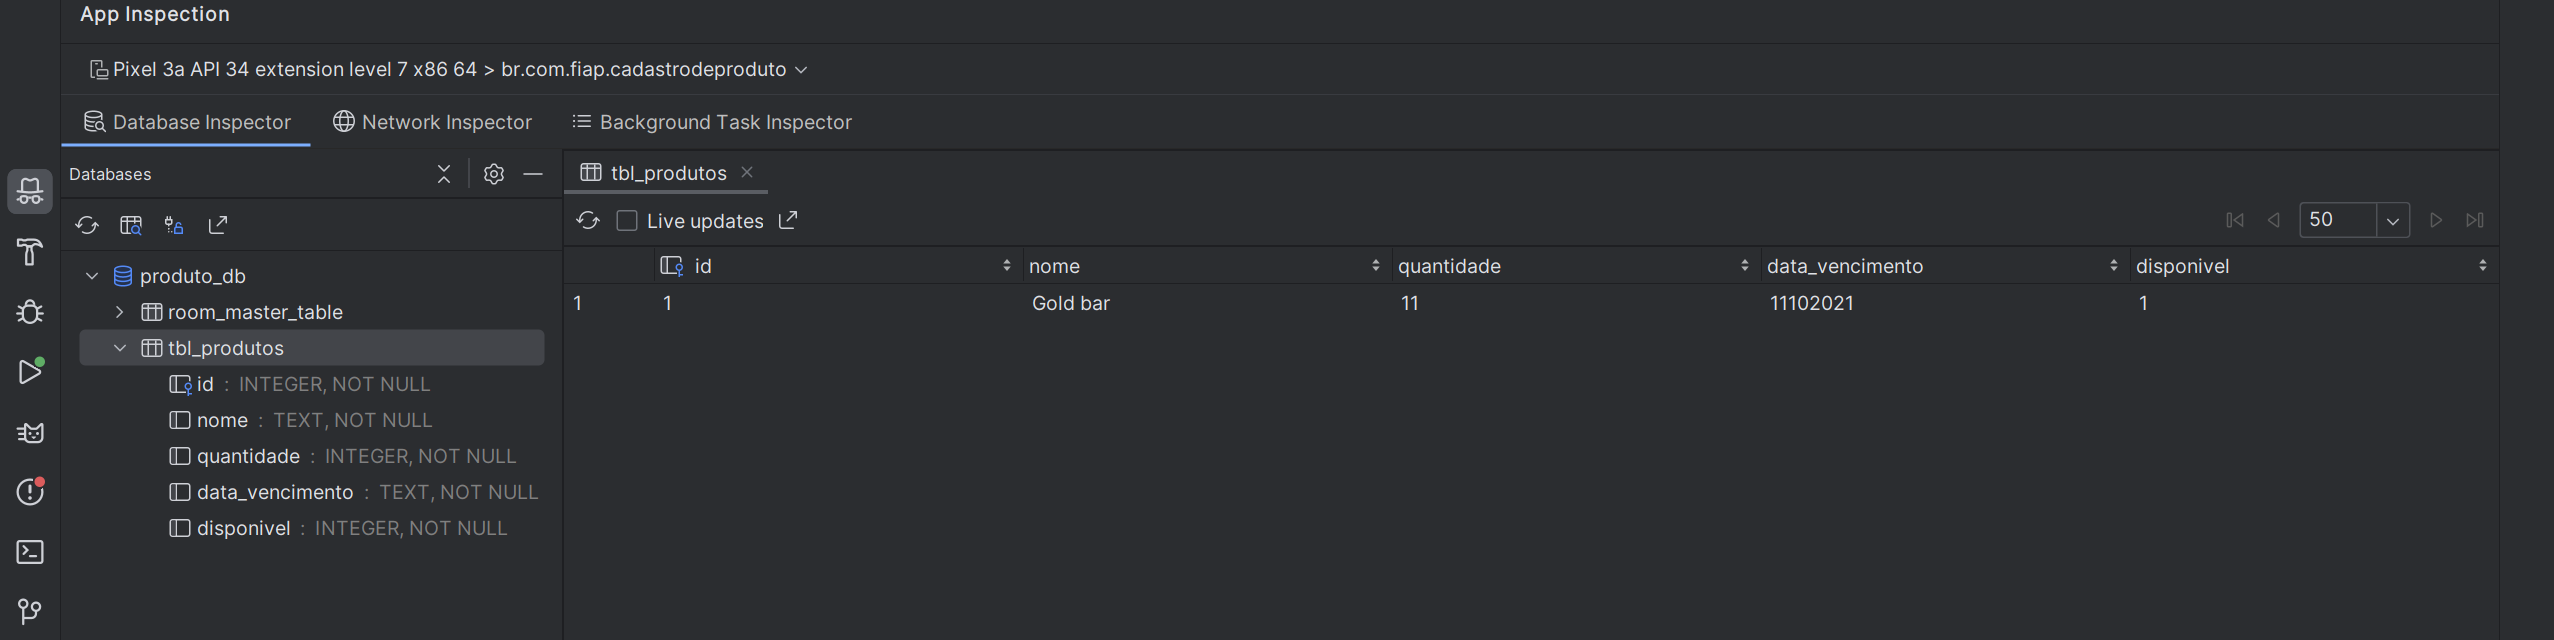

</center>

## Recuperando registros do banco de dados

Ja conseguimos gravar, agora queremos recuperar registros do banco de dados! 

Para isso..

- Criaremos um var que receba um lista de todos produtos, do tipo mutableStateOf com remember

In [ ]:
//    Var que guarda a lista de todos os produtos, do tipo remember
var listaProdutoState = remember {
    mutableStateOf(produtoRepository.listarTodosOsProdutos())
}

E passaremos a tela a função que SE tiver produtos salvos que os demonstre da seguinte maneira:

- Criaremos um Columns, que guarda um if, com a condição de que se tiver produto na lista, mostra card
- Este card tera os texts com os valores dos atributos

In [ ]:
Button(
    onClick = {
        //Criamos o produto passando seus atributos
        val produto = Produto(
            0,
            nomeProdutoState,
            quantidadeProdutoState.toInt(),
            dataVencimentoState,
            disponivelState
        )
        //salvo usando o repository com o método salvar
        produtoRepository.salvar(produto)
    },
    modifier = Modifier.fillMaxWidth(),
    colors = ButtonDefaults.buttonColors(containerColor = Color(0xFFD81B60))
) {
    Text(text = "Salvar")
}
Spacer(modifier = Modifier.height(16.dp))
Column(
    modifier = Modifier
        .fillMaxSize()
        .padding(16.dp)
        .verticalScroll(rememberScrollState())
) {

    // For para verificar se temos produto na lista e se tiver que os imprima no card 
    for (produto in listaProdutoState.value) {

        Card(
            modifier = Modifier.fillMaxWidth(),
            colors = CardDefaults.cardColors(containerColor = Color.LightGray)
        ) {
            Row(verticalAlignment = Alignment.CenterVertically) {
                Column(
                    modifier = Modifier
                        .padding(8.dp)
                        .weight(2f)
                ) {

                    Text(
                        text = produto.nome,                        //aqui imprimimos o nome
                        fontSize = 24.sp,
                        fontWeight = FontWeight.Bold
                    )
                    Row {
                    Text(text = "Quantidade :")
                    Text(text = produto.quantidade.toString(), fontSize = 16.sp)          //aqui imprimimos a quantidade em string
                    }
                    Row {
                    Text(text = "Data Vencimento: ")
                    Text(text = produto.dataVencimento)
                    }
                    Text(text = if (produto.disponivel) "Disponivel" else "Indisponível")     //aqui se for true mostre dispo se não indispo

                }
            }
        }
        Spacer(modifier = Modifier.height(16.dp))

    }

Além disso! seria o ideal que ao inserir um produto, nossa lista fosse atualizada automaticamente, certo?

Por tanto vamos fazer este ajuste!

- Ao clicar no botão de salvar, além de salvar o conteúdo, chamaremos tambem nossa função que atualiza, da seguinte maneira:

In [ ]:
Button(
    onClick = {
        //Criamos o produto passando seus atributos
        val produto = Produto(
            0,
            nomeProdutoState,
            quantidadeProdutoState.toInt(),
            dataVencimentoState,
            disponivelState
        )
        //salvo usando o repository com o método salvar
        produtoRepository.salvar(produto = produto)
        //atualizar
        produtoRepository.atualizar(produto = produto)
    },
    modifier = Modifier.fillMaxWidth(), colors = ButtonDefaults.buttonColors(containerColor = Color(0xFFD81B60))
) {Text(text = "Salvar") }

## Apagando dados no banco de dados

Adicionaremos o método que excluir do repository:

In [ ]:
IconButton(onClick = {
    val produtoRepository = ProdutoRepository(context)
    produtoRepository.excluir(produto = produto)
    atualizar()
}) {
    Icon(imageVector = Icons.Default.Delete, contentDescription = "Delete")

}

..//Neste ultimo CRUD tive dificuldade